In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [ ]:
from citipy import citipy

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

albany au
naze jp
qaanaaq gl
atuona pf
ribeira grande pt
khilok ru
pemberton ca
sao joao da barra br
puerto ayora ec
golyshmanovo ru
nioro ml
margate za
male mv
coihaique cl
ponta do sol cv
mataura pf
vaitupu wf
vaini to
sibolga id
new norfolk au
rikitea pf
nikolskoye ru
north bend us
fortuna us
thompson ca
huilong cn
mataura pf
portland au
maposeni tz
san quintin mx
puerto ayora ec
galiwinku au
ust-shonosha ru
rikitea pf
parakou bj
thanh hoa vn
ponta do sol cv
coihaique cl
montepuez mz
chilca pe
saint george bm
srednekolymsk ru
ushuaia ar
busselton au
puerto carreno co
north bend us
busselton au
busselton au
baixo guandu br
emba kz
ushuaia ar
ponta do sol cv
valladolid es
vestmannaeyjar is
nishihara jp
baleshwar in
truth or consequences us
kiama au
vaini to
pevek ru
ponta do sol cv
ejido ve
albany au
torbay ca
sitka us
busselton au
yellowknife ca
khatanga ru
tondano id
hami cn
sidrolandia br
mys shmidta ru
narsaq gl
busselton au
carndonagh ie
touros br
jamestown sh
east london za
vain

clyde river ca
nouadhibou mr
amderma ru
riyadh sa
bengkulu id
masyaf sy
ancud cl
ewa beach us
san jose de guanipa ve
rikitea pf
clyde river ca
busselton au
verkhoyansk ru
jamestown sh
puerto ayora ec
punta arenas cl
douentza ml
punta arenas cl
ancud cl
barrow us
ponta delgada pt
ushuaia ar
severo-kurilsk ru
sorland no
hithadhoo mv
wuwei cn
charters towers au
luderitz na
soyo ao
muleba tz
umzimvubu za
rikitea pf
punta arenas cl
yar-sale ru
barentsburg sj
sao filipe cv
avarua ck
terney ru
betanzos bo
russell nz
belushya guba ru
rikitea pf
bengkulu id
rikitea pf
jamestown sh
thinadhoo mv
cape town za
hualmay pe
mataura pf
nishihara jp
richards bay za
tokur ru
mys shmidta ru
rikitea pf
iqaluit ca
taolanaro mg
ushuaia ar
teya ru
nantucket us
saint-philippe re
port blair in
lompoc us
pisco pe
barrow us
saldanha za
golovino ru
moron mn
albany au
manggar id
canitas mx
yellowknife ca
klaksvik fo
uttarkashi in
bosaso so
barrow us
cockburn town tc
kruisfontein za
itarema br
hambantota lk
ihiala n

hermanus za
illoqqortoormiut gl
kenai us
sitka us
upernavik gl
ushuaia ar
port alfred za
ushuaia ar
hermanus za
albany au
kodiak us
barrow us
vaini to
albany au
samalaeulu ws
puerto ayora ec
bethel us
lasa cn
cascais pt
hofn is
albany au
saint george bm
punta arenas cl
tuktoyaktuk ca
sentyabrskiy ru
mao td
pangnirtung ca
avarua ck
attawapiskat ca
zemio cf
atuona pf
walvis bay na
vaini to
albany au
ushuaia ar
mataura pf
bredasdorp za
sakakah sa
rikitea pf
hermanus za
hobart au
rikitea pf
assomada cv
conceicao do araguaia br
areosa pt
varhaug no
punta arenas cl
muskegon us
yar-sale ru
maniwaki ca
kruisfontein za
palu id
tual id
cape town za
sitka us
gladstone au
vaini to
ushuaia ar
bluff nz
coquimbo cl
constitucion mx
tasiilaq gl
manaure co
khani ru


In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [25]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | naze
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | khilok
Processing Record 7 of Set 1 | pemberton
Processing Record 8 of Set 1 | sao joao da barra
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | golyshmanovo
Processing Record 11 of Set 1 | nioro
Processing Record 12 of Set 1 | margate
Processing Record 13 of Set 1 | male
Processing Record 14 of Set 1 | coihaique
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | sibolga
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | nikolskoye
Processing 

Processing Record 39 of Set 4 | quatre cocos
Processing Record 40 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 41 of Set 4 | maturin
Processing Record 42 of Set 4 | laem sing
Processing Record 43 of Set 4 | anadyr
Processing Record 44 of Set 4 | faanui
Processing Record 45 of Set 4 | krasnoselkup
Processing Record 46 of Set 4 | kapaa
Processing Record 47 of Set 4 | pokhara
Processing Record 48 of Set 4 | balkhash
Processing Record 49 of Set 4 | san cristobal
Processing Record 50 of Set 4 | zhigansk
Processing Record 1 of Set 5 | angoche
Processing Record 2 of Set 5 | karonga
Processing Record 3 of Set 5 | oxford
Processing Record 4 of Set 5 | kachikau
City not found. Skipping...
Processing Record 5 of Set 5 | erenhot
Processing Record 6 of Set 5 | malindi
Processing Record 7 of Set 5 | sahuaripa
Processing Record 8 of Set 5 | clyde river
Processing Record 9 of Set 5 | biak
Processing Record 10 of Set 5 | burns lake
Processing Record 11 of Set 5 | charters towers
Pr

Processing Record 30 of Set 8 | avera
Processing Record 31 of Set 8 | ribas do rio pardo
Processing Record 32 of Set 8 | vardo
Processing Record 33 of Set 8 | ust-nera
Processing Record 34 of Set 8 | nouadhibou
Processing Record 35 of Set 8 | riyadh
Processing Record 36 of Set 8 | masyaf
Processing Record 37 of Set 8 | ewa beach
Processing Record 38 of Set 8 | san jose de guanipa
Processing Record 39 of Set 8 | verkhoyansk
Processing Record 40 of Set 8 | douentza
Processing Record 41 of Set 8 | ponta delgada
Processing Record 42 of Set 8 | wuwei
Processing Record 43 of Set 8 | muleba
Processing Record 44 of Set 8 | yar-sale
Processing Record 45 of Set 8 | avarua
Processing Record 46 of Set 8 | terney
Processing Record 47 of Set 8 | betanzos
Processing Record 48 of Set 8 | russell
Processing Record 49 of Set 8 | thinadhoo
Processing Record 50 of Set 8 | richards bay
Processing Record 1 of Set 9 | tokur
Processing Record 2 of Set 9 | teya
Processing Record 3 of Set 9 | nantucket
Processi

Processing Record 21 of Set 12 | san-pedro
Processing Record 22 of Set 12 | bani walid
Processing Record 23 of Set 12 | progreso
Processing Record 24 of Set 12 | raudeberg
Processing Record 25 of Set 12 | apia
Processing Record 26 of Set 12 | puerto narino
Processing Record 27 of Set 12 | kinwat
Processing Record 28 of Set 12 | la romana
Processing Record 29 of Set 12 | paracatu
Processing Record 30 of Set 12 | port macquarie
Processing Record 31 of Set 12 | baoqing
Processing Record 32 of Set 12 | prince rupert
Processing Record 33 of Set 12 | urucara
Processing Record 34 of Set 12 | banjar
Processing Record 35 of Set 12 | tura
Processing Record 36 of Set 12 | buta
Processing Record 37 of Set 12 | san policarpo
Processing Record 38 of Set 12 | lazaro cardenas
Processing Record 39 of Set 12 | sorochinsk
Processing Record 40 of Set 12 | campos altos
Processing Record 41 of Set 12 | bugiri
Processing Record 42 of Set 12 | amazar
Processing Record 43 of Set 12 | presidencia roque saenz pe

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,79.21,61,99,4.29,US,2022-07-31 23:03:40
1,Naze,28.3667,129.4833,80.51,84,100,20.71,JP,2022-07-31 23:03:40
2,Qaanaaq,77.4840,-69.3632,46.33,60,66,1.41,GL,2022-07-31 23:03:40
3,Atuona,-9.8000,-139.0333,76.87,75,12,14.50,PF,2022-07-31 23:03:41
4,Ribeira Grande,38.5167,-28.7000,74.12,73,16,2.91,PT,2022-07-31 23:03:41
5,Khilok,51.3674,110.4676,59.81,88,65,3.13,RU,2022-07-31 23:03:41
6,Pemberton,50.3164,-122.8027,95.32,20,1,6.42,CA,2022-07-31 23:03:42
7,Sao Joao Da Barra,-21.6403,-41.0511,67.42,71,2,6.87,BR,2022-07-31 23:03:42
8,Puerto Ayora,-0.7393,-90.3518,72.55,87,85,5.99,EC,2022-07-31 23:03:42
9,Golyshmanovo,56.3979,68.3728,58.80,97,95,8.32,RU,2022-07-31 23:03:43


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-07-31 23:03:40,42.6001,-73.9662,79.21,61,99,4.29
1,Naze,JP,2022-07-31 23:03:40,28.3667,129.4833,80.51,84,100,20.71
2,Qaanaaq,GL,2022-07-31 23:03:40,77.4840,-69.3632,46.33,60,66,1.41
3,Atuona,PF,2022-07-31 23:03:41,-9.8000,-139.0333,76.87,75,12,14.50
4,Ribeira Grande,PT,2022-07-31 23:03:41,38.5167,-28.7000,74.12,73,16,2.91
5,Khilok,RU,2022-07-31 23:03:41,51.3674,110.4676,59.81,88,65,3.13
6,Pemberton,CA,2022-07-31 23:03:42,50.3164,-122.8027,95.32,20,1,6.42
7,Sao Joao Da Barra,BR,2022-07-31 23:03:42,-21.6403,-41.0511,67.42,71,2,6.87
8,Puerto Ayora,EC,2022-07-31 23:03:42,-0.7393,-90.3518,72.55,87,85,5.99
9,Golyshmanovo,RU,2022-07-31 23:03:43,56.3979,68.3728,58.80,97,95,8.32


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

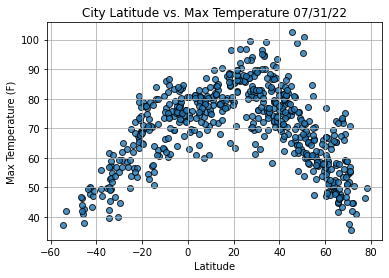

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

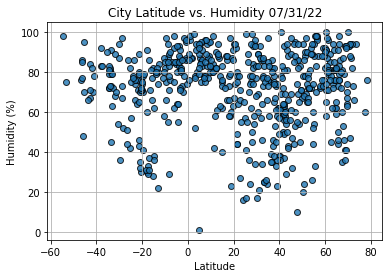

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

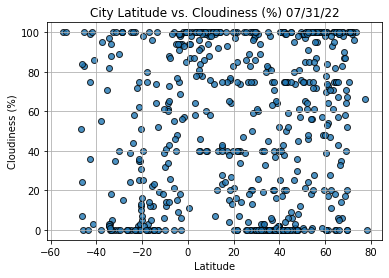

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

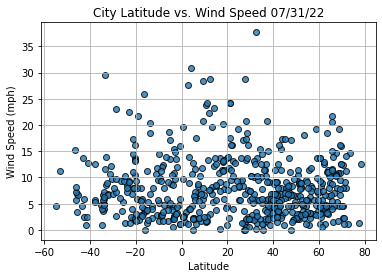

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City                    Coihaique
Country                        CL
Date          2022-07-31 23:03:44
Lat                      -45.5752
Lng                      -72.0662
Max Temp                    38.01
Humidity                       70
Cloudiness                    100
Wind Speed                   6.91
Name: 13, dtype: object

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-07-31 23:03:40,42.6001,-73.9662,79.21,61,99,4.29
1,Naze,JP,2022-07-31 23:03:40,28.3667,129.4833,80.51,84,100,20.71
2,Qaanaaq,GL,2022-07-31 23:03:40,77.4840,-69.3632,46.33,60,66,1.41
4,Ribeira Grande,PT,2022-07-31 23:03:41,38.5167,-28.7000,74.12,73,16,2.91
5,Khilok,RU,2022-07-31 23:03:41,51.3674,110.4676,59.81,88,65,3.13


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

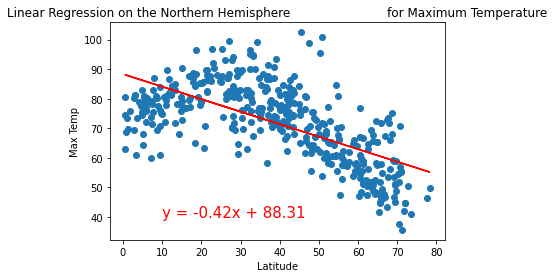

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

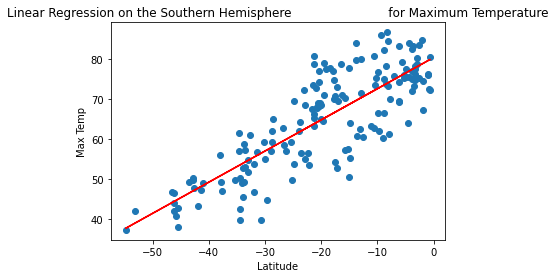

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

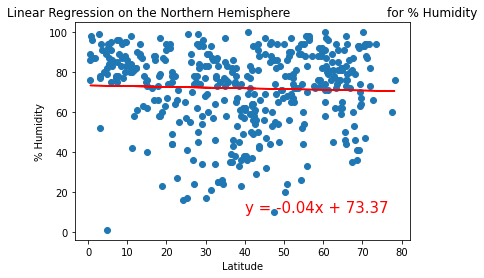

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

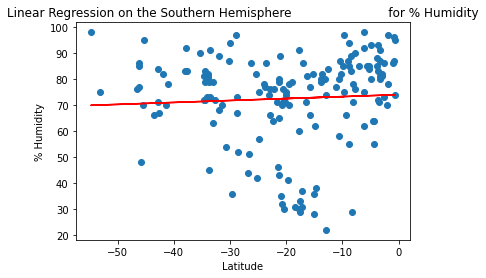

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

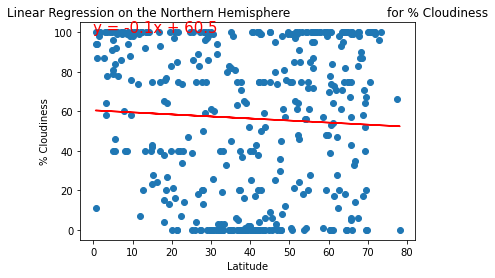

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,100))

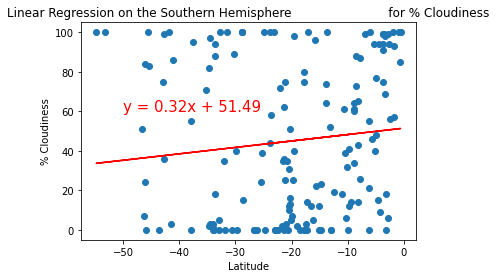

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

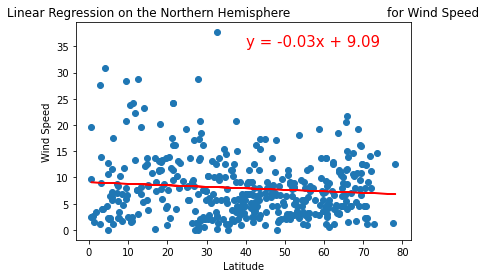

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

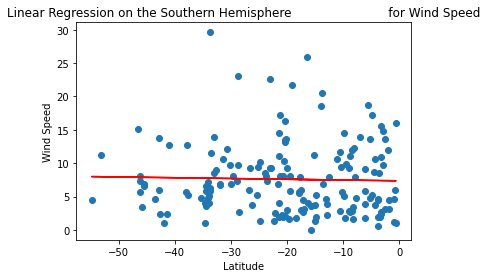

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [49]:
  # Run regression on hemisphere weather data
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

-0.02867534997449216
